## Infos
### User logs (26.758.971 linhas)
| Campo | Tipo | Observações | Analisado |
|-------|------|-------------|-----------|
| msno | String | Há valores repetidos | ✅ |
| safra | Integer | Mês e ano da análise | ✅ |
| num_25 | Integer | Possui outliers | ✅ |
| num_50 | Integer | Possui outliers | ✅ |
| num_75 | Integer | Possui outliers | ✅ |
| num_985 | Integer | Possui outliers | ✅ |
| num_100 | Integer | Possui outliers | ✅ |
| num_unq | Integer | Possui outliers | ✅ |
| total_secs | Float | Possui outliers | ✅ |
| total_hours | Float | (Coluna gerada) | ✅ |

<br>

**TODO**<br>
- Transformar `total_secs` em horas + deletar `total_secs` ✅
- Remover outliers de: ✅
    - num_25 ✅
    - num_50 ✅
    - num_75 ✅
    - num_985 ✅
    - num_100 ✅
    - num_unq ✅


In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from Utils.DataLoader import DataLoader
from Utils.DataAnalysis import DataAnalysis
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple
from Utils import PandasNotebookConfigs

# User Logs

In [ ]:
DATA_LOADER = DataLoader()
DATA_ANALYSIS = DataAnalysis()

PandasNotebookConfigs.config()

In [7]:
user_logs_df = DATA_LOADER.load_user_logs_df()

In [8]:
print(f'Rows qty: {len(user_logs_df)}')

Rows qty: 26086234


In [9]:
user_logs_df.dtypes

msno            object
safra            int32
num_25           int64
num_50           int64
num_75           int64
num_985          int64
num_100          int64
num_unq          int64
total_hours    float64
dtype: object

In [18]:
user_logs_df.head(10)

,msno,safra,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_hours
0,SwlrSivYHoKF9V5wm1YYYAnjHpd9y3OPjI9rDUhGJ3k=,201701,121,28,14,29,704,827,184606,51.28
1,rE5wSmHEF1Dhu55zhkiGB1HvotdlSHcIMGXv6VcqO2A=,201605,26,2,5,6,462,256,119439,33.18
2,hx+cyaQ/Jcdr/Z5foa/Cn0PXUzC/F7QO/NQvWQS1Qtc=,201611,161,71,49,34,668,891,204791,56.89
3,53QW6B70J23X2UCvxaaUppjyE0b6X9nzP79W4huZv+Q=,201502,37,9,3,9,408,447,101186,28.11
4,/0S1N/oRyxGLZlzxnW5rOjfo0ZAls9EH23ahuDNuqz8=,201506,205,49,23,21,225,489,69957,19.43
5,qB/zteXKaOk3hzFCoIUD6wrTp57hnreDX4Vvon25MfM=,201509,52,10,10,20,308,264,81703,22.70
6,7btpXOqzA1ggOggSW81L05zDYyDjO7dXgmwZVzYmI2Q=,201610,159,53,30,43,1075,881,305353,84.82
7,kgEhriAqTydVKQ1xn+ZzKQzf4sQ1aod5zcEg5ksyWrE=,201609,88,13,14,13,588,325,159511,44.31
8,8uQ6M7OzdWsuzo0BRZ6siIPZfBoG43bRvlm+My36B6k=,201509,62,27,15,6,1389,1427,324691,90.19
9,T2gUhlBhFMoSFA9jFI/BkuyE/EPA6oneabYQiGBy9wU=,201702,36,23,5,9,216,241,56296,15.64


In [8]:
# # Checking if all float fields are, actually, integers
# cols = [
#     'num_25',
#     'num_50',
#     'num_75',
#     'num_985',
#     'num_100',
#     'num_unq',
#     'total_secs',
# ]
# for c in cols:
#     is_int = check_if_float_field_is_integer(user_logs_df, c)
#     print(f'Col {c} is actually integer? {is_int}')
    
#     if is_int:
#         print(f'Converting to integer')
#         user_logs_df[c] = user_logs_df[c].astype(int)

In [9]:
user_logs_df.dtypes

msno          object
safra          int32
num_25         int64
num_50         int64
num_75         int64
num_985        int64
num_100        int64
num_unq        int64
total_secs     int64
dtype: object

In [10]:
user_logs_df.num_25.value_counts()

num_25
0       1381992
1       1175935
2        849489
3        685660
4        581587
         ...   
4467          1
5792          1
3877          1
6233          1
6277          1
Name: count, Length: 4891, dtype: int64

<Axes: >

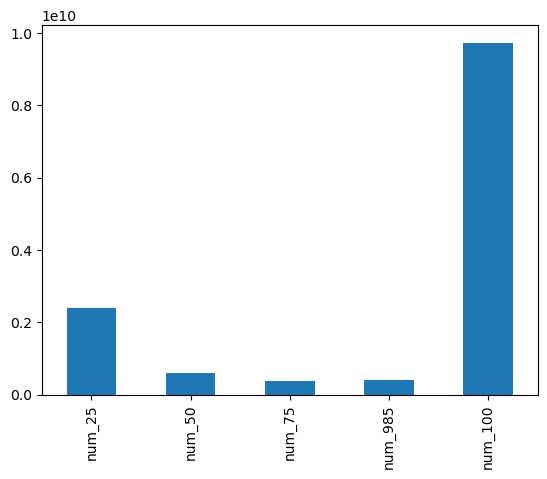

In [10]:
user_logs_df[['num_25', 'num_50', 'num_75', 'num_985', 'num_100']].sum().plot.bar()

In [11]:
user_logs_df.describe()

,safra,num_25,num_50,num_75,num_985,num_100,num_unq,total_hours
count,26086234.00,26086234.00,26086234.00,26086234.00,26086234.00,26086234.00,26086234.00,26086234.00
mean,201572.23,91.78,22.74,14.08,15.32,373.31,388.64,27.79
std,61.89,154.55,33.57,19.68,26.64,470.36,456.44,33.80
min,201501.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,201508.00,9.00,2.00,1.00,1.00,34.00,47.00,2.92
50%,201602.00,39.00,11.00,7.00,7.00,199.00,227.00,15.45
75%,201609.00,111.00,29.00,19.00,19.00,527.00,565.00,39.69
max,201702.00,7184.00,394.00,214.00,2498.00,8242.00,4361.00,182.00


In [29]:
pd.cut(user_logs_df['total_hours'], right=False, bins=8)

0           [0.000278, 91.25)
1           [0.000278, 91.25)
2           [0.000278, 91.25)
3           [0.000278, 91.25)
4           [0.000278, 91.25)
                  ...        
26758966    [0.000278, 91.25)
26758967    [0.000278, 91.25)
26758968    [0.000278, 91.25)
26758969    [0.000278, 91.25)
26758970    [0.000278, 91.25)
Name: total_hours, Length: 26707080, dtype: category
Categories (8, interval[float64, left]): [[0.000278, 91.25) < [91.25, 182.499) < [182.499, 273.748) < [273.748, 364.997) < [364.997, 456.247) < [456.247, 547.496) < [547.496, 638.745) < [638.745, 730.724)]

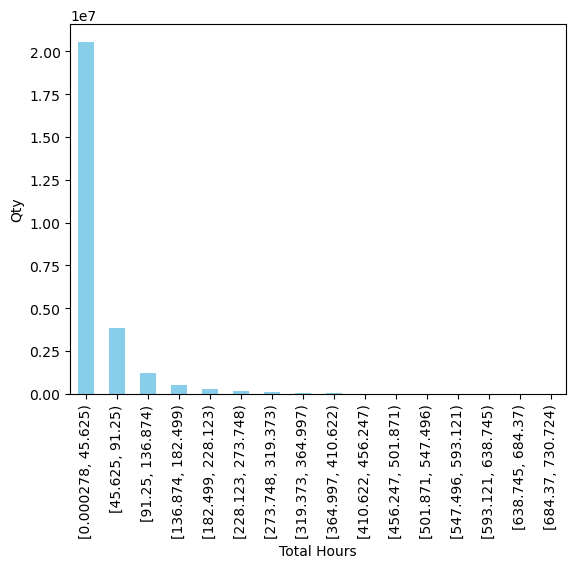

In [ ]:
pd.cut(user_logs_df['total_hours'], right=False, bins=16).value_counts().sort_index().plot(
    kind='bar',
    color='skyblue',
    xlabel='Total Hours',
    ylabel='Qty'
);

Remove outliers greater than 182 hours of playing

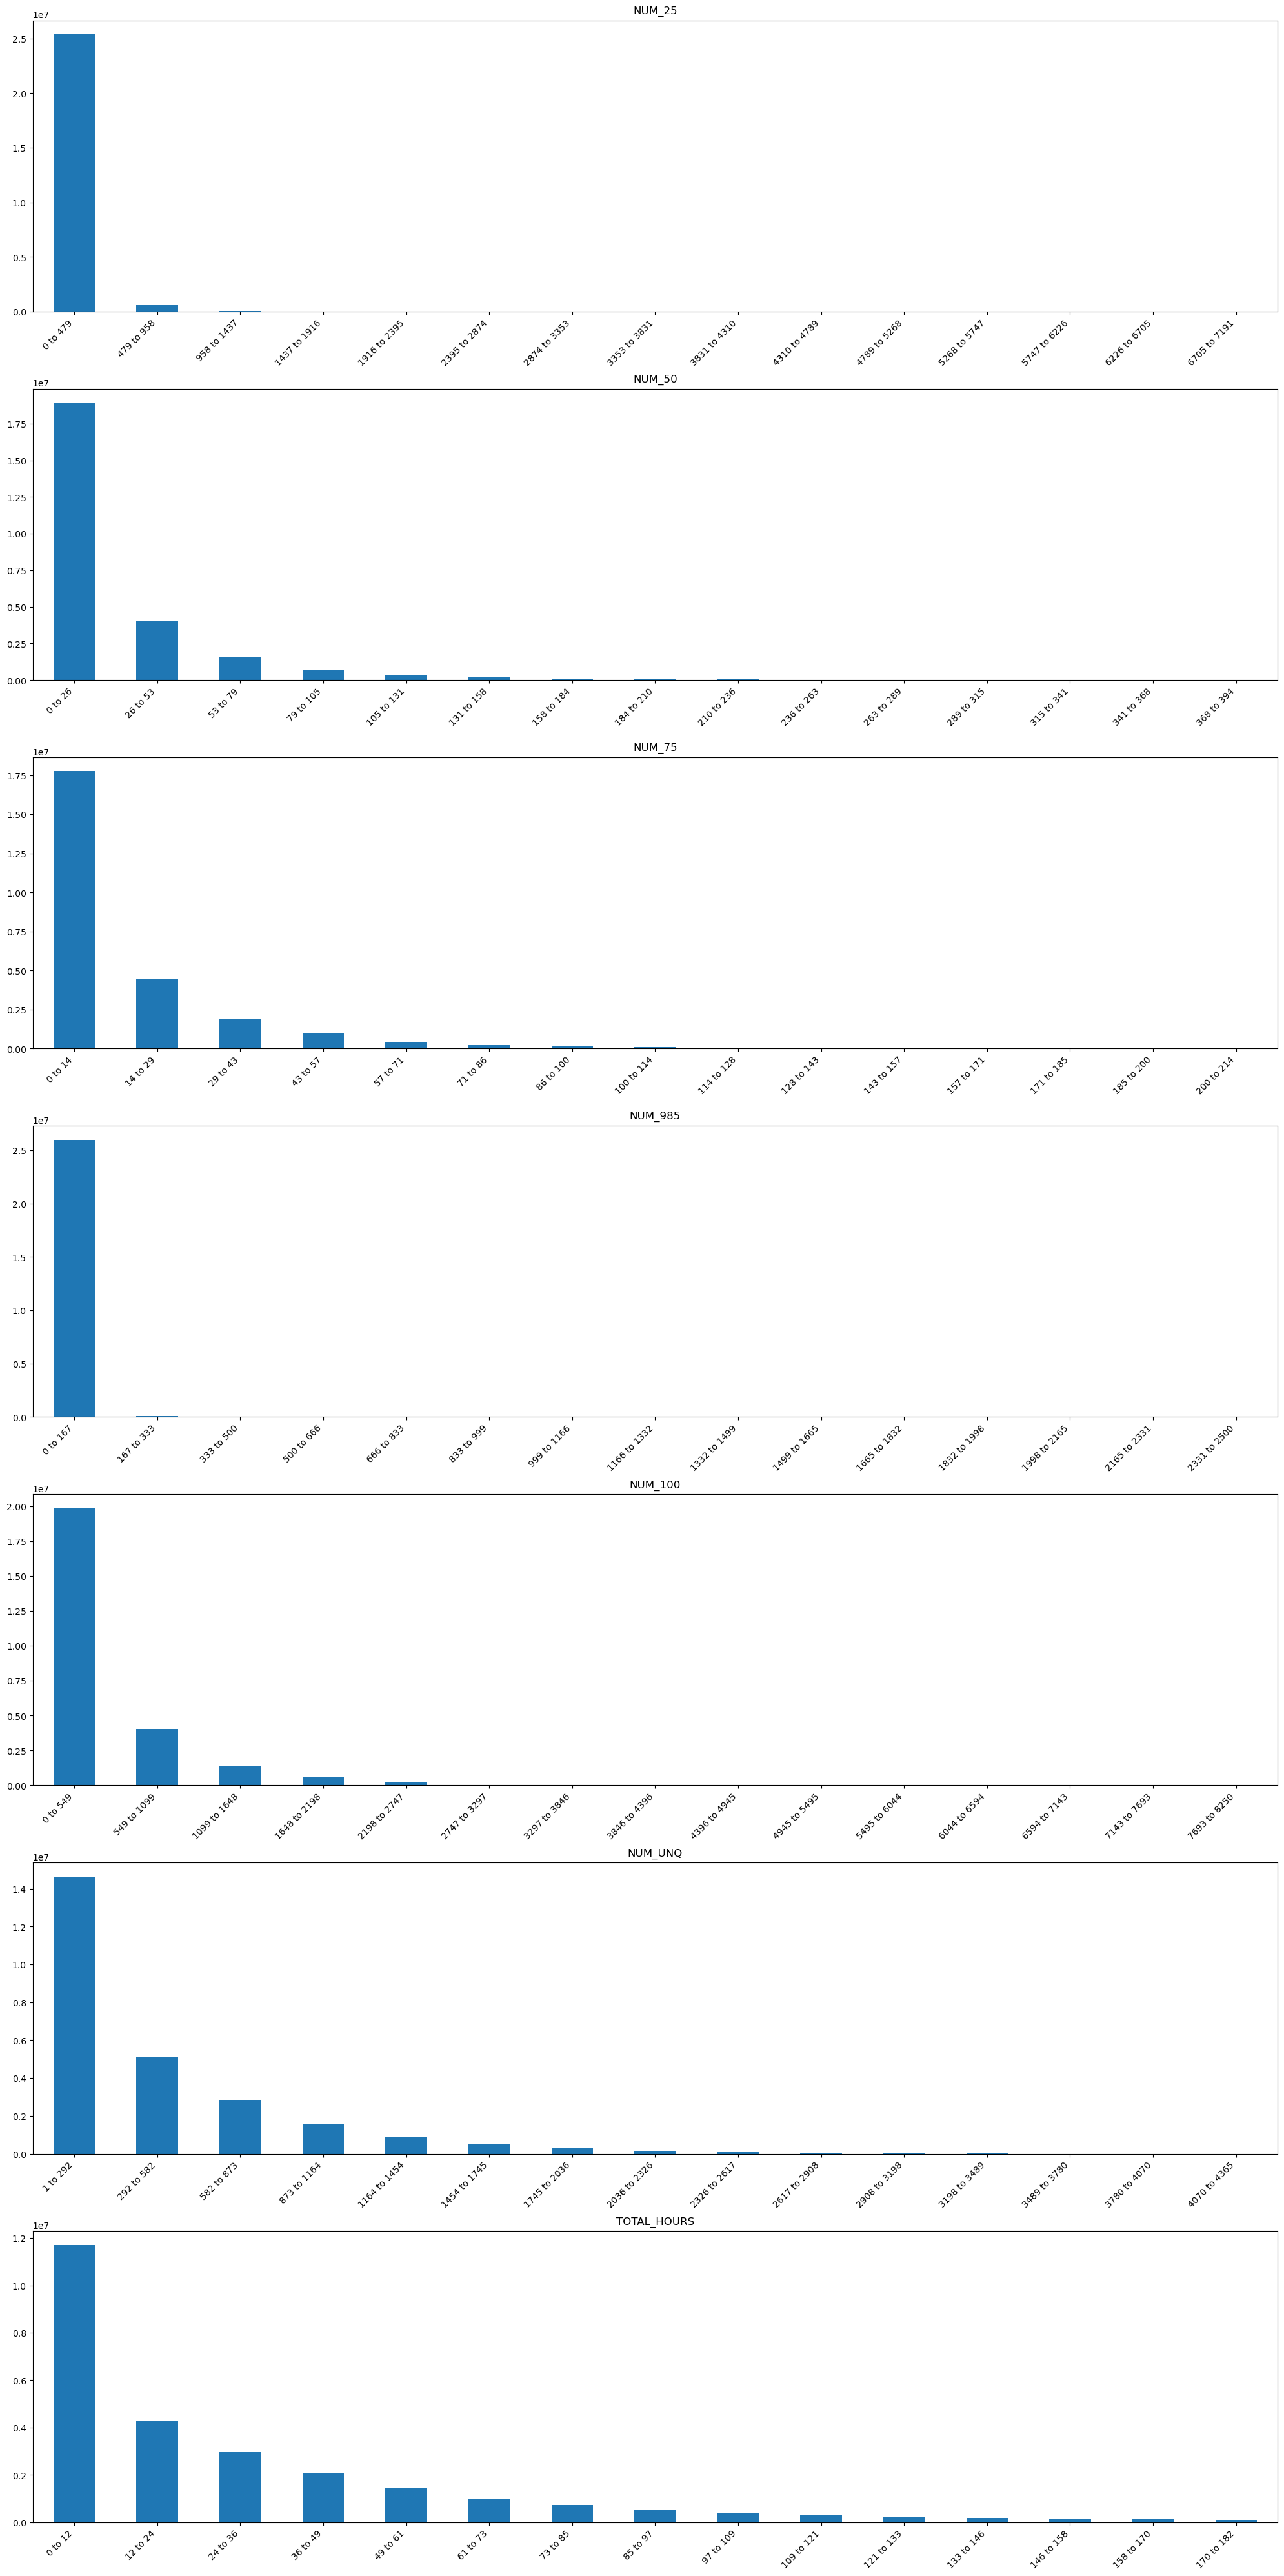

In [13]:
DATA_ANALYSIS.plot_outliers_by_bins(
    user_logs_df,
    fields=['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_hours'],
    figsize=(20, 40)
    # fields=['num_25', 'num_50'],
)

In [181]:
user_logs_df[user_logs_df['num_unq'] > 3000]

,msno,safra,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_hours
261,/5cmvtJTBIjetq4hMfV5uCyo4rsXnjS0eLNIGsOCQKg=,201603,475,338,82,49,3071,3191,771541,214.32
275,/BxqnkpCCocZ3Crc43k0sIFySnsbDF/6ocGblFg6Zpk=,201504,8,6,7,10,3970,3845,909284,252.58
279,/E9JIZTKNxqRHMNNpgNypUnp3q/gUH5GOAUE0lzrw0s=,201603,2471,259,236,202,1210,3418,398126,110.59
394,0CP3Z65otkD8F+ayOWmEeI8RFvdOySI4qo3/P9lDGTs=,201512,61,24,18,20,6317,6055,1556832,432.45
475,0lzniE5kHODGX/cZqGqcmnfKxX+IPxxvEw4YmbHOXHw=,201603,7,1,3,79,9588,7279,1477746,410.49
...,...,...,...,...,...,...,...,...,...,...
26721712,OUThCikbgVgoS8+6u6VrkIFCOkPdqJrYvld3hCQAddQ=,201702,221,39,24,26,3595,3123,885477,245.97
26724354,B1Bhj9cY48tJrKRyrOZhHNO2FsxZl1mSzRM6zlSWXHM=,201702,46,20,18,21,4399,4259,1017028,282.51
26724534,a6DLFuEqNZJLhhfr+xJKhabE5TEgsCwfD51gEZiR264=,201612,30,24,15,13,4055,3832,919965,255.55
26728688,NQ9Uco0t4HZKbRHf0Mk0vXgF1bKX5qRtoFNtj7mMOuA=,201502,125,39,17,45,4922,4403,1152077,320.02
